In [1]:
from ecallisto_ng.data_fetching.get_information import get_tables, get_table_names_with_data_between_dates
from datetime import datetime, timedelta
from ecallisto_ng.data_fetching.get_data import get_data
from ecallisto_ng.plotting.plotting import plot_spectogram_mpl, fill_missing_timesteps_with_nan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from ecallisto_ng.data_fetching.get_data import NoDataAvailable, get_data
from ecallisto_ng.plotting.utils import (
    fill_missing_timesteps_with_nan,
    return_strftime_based_on_range,
    timedelta_to_sql_timebucket_value,
)
from glob import glob

In [2]:
start_datetime = datetime(2023, 9, 28, 9, 00, 0).strftime("%Y-%m-%d %H:%M:%S")
end_datetime = datetime(2023, 9, 28, 9, 10, 0).strftime("%Y-%m-%d %H:%M:%S")
data_folder = 'data_3'

In [3]:
tables = get_tables()

In [4]:
location = ['swiss', 'germany', 'austria', 'glasgow', 'egypt', 'ethiopia', 'denmark', 'spain', 'triest', 'krim']

In [5]:
tables = get_tables()
eu_tables = [table for table in tables if any(loc in table for loc in location)]

In [6]:
for table in tables:
    print(table)
    if table in ['swiss_heiterswil_59', 'spain_siguenza_02', 'roswell_nm_57', 'southafrica_sansa_01', 'norway_ny_aalesund_01']:
        continue
    fast_api_parameter =  {
        "instrument_name": table,
        "start_datetime": start_datetime,
        "end_datetime": end_datetime,
        "timebucket": "0.25s",
        "agg_function": "MAX",
    }
    try:
        df = get_data(**fast_api_parameter)
        file_name = f"{data_folder}/{table}_{start_datetime}_{end_datetime}.parquet"
        df.to_parquet(file_name)
    except Exception as e:
        print(e)
        continue

thailand_pathumthani_01
No data available for {'instrument_name': 'thailand_pathumthani_01', 'start_datetime': '2023-09-28 09:00:00', 'end_datetime': '2023-09-28 09:10:00', 'timebucket': '0.25s', 'agg_function': 'MAX'}
mexico_fcfm_uanl_01
No data available for {'instrument_name': 'mexico_fcfm_uanl_01', 'start_datetime': '2023-09-28 09:00:00', 'end_datetime': '2023-09-28 09:10:00', 'timebucket': '0.25s', 'agg_function': 'MAX'}
nasa_02
No data available for {'instrument_name': 'nasa_02', 'start_datetime': '2023-09-28 09:00:00', 'end_datetime': '2023-09-28 09:10:00', 'timebucket': '0.25s', 'agg_function': 'MAX'}
xcountry_62
No data available for {'instrument_name': 'xcountry_62', 'start_datetime': '2023-09-28 09:00:00', 'end_datetime': '2023-09-28 09:10:00', 'timebucket': '0.25s', 'agg_function': 'MAX'}
japan_ibaraki_59
No data available for {'instrument_name': 'japan_ibaraki_59', 'start_datetime': '2023-09-28 09:00:00', 'end_datetime': '2023-09-28 09:10:00', 'timebucket': '0.25s', 'agg_f

In [ ]:
files = glob(f"{data_folder}/*.parquet")

In [ ]:
datas = [pd.read_parquet(file) for file in files if any(loc in file for loc in location)]

In [ ]:
for i, data in enumerate(datas):
    if len(data.columns) < 2:
        datas.pop(i)

In [ ]:
datas[5].attrs['INSTRUME']

IndexError: list index out of range

/home/kenfus/miniconda3/envs/ecallisto_virtual_antenna/lib/python3.11/site-packages/ecallisto_ng/plotting/plotting.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=fig_size)


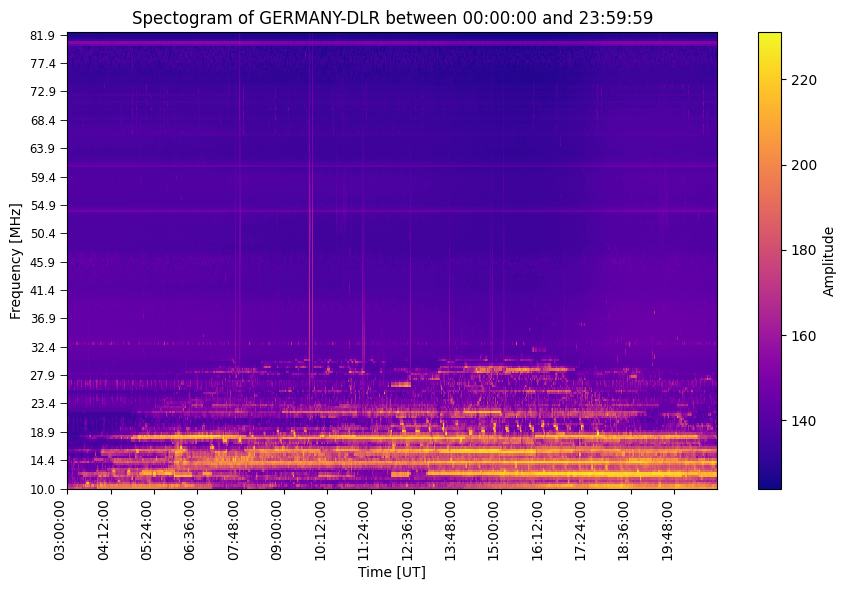

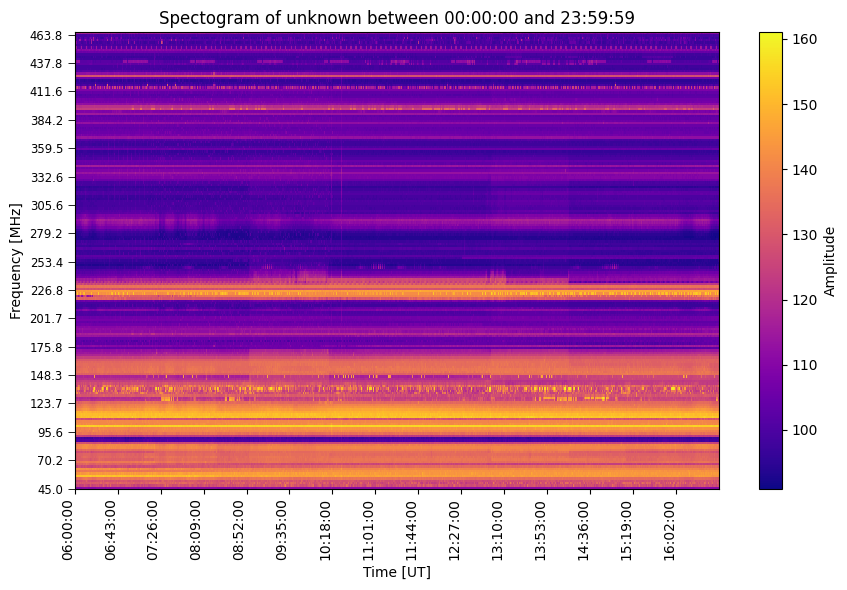

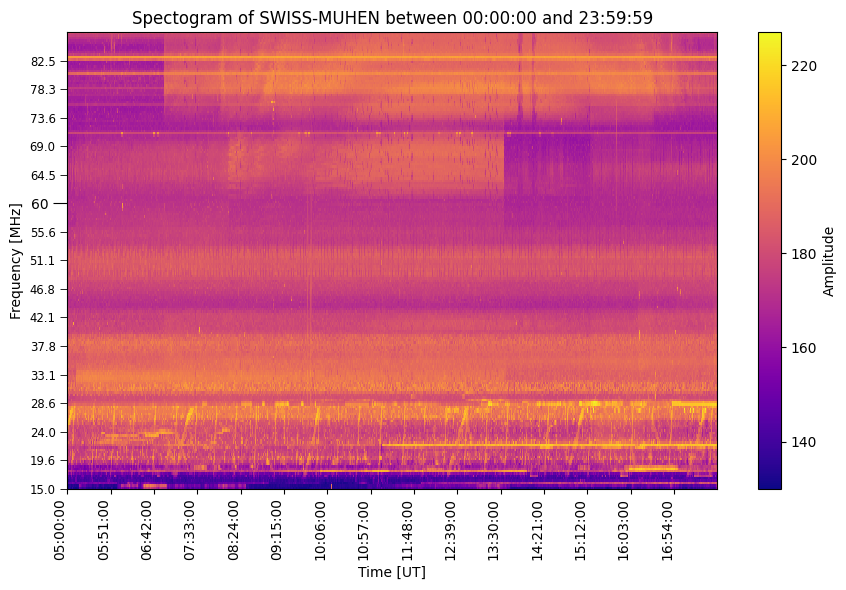

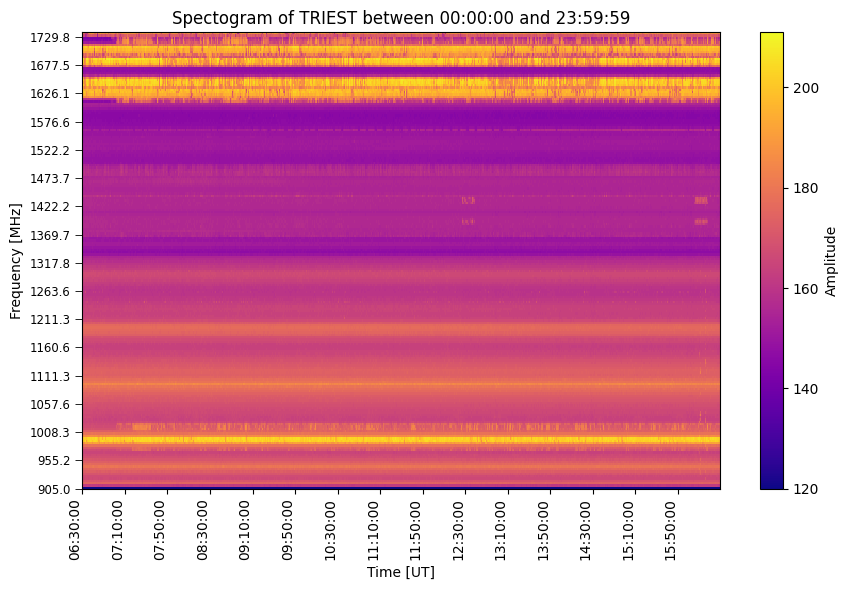

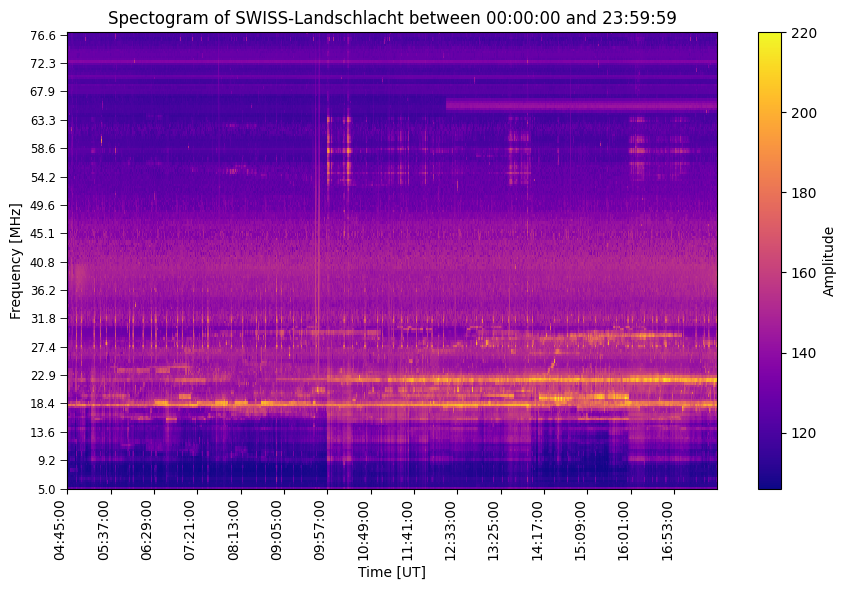

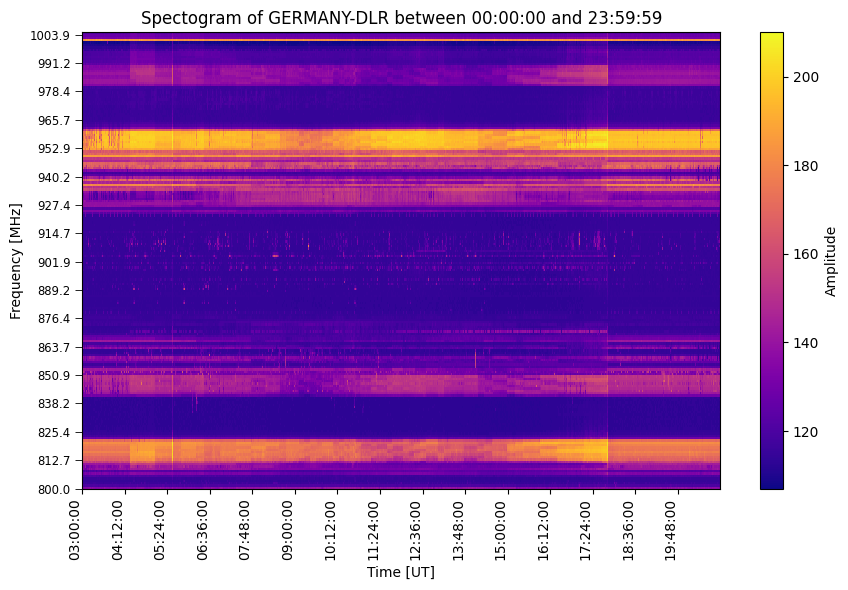

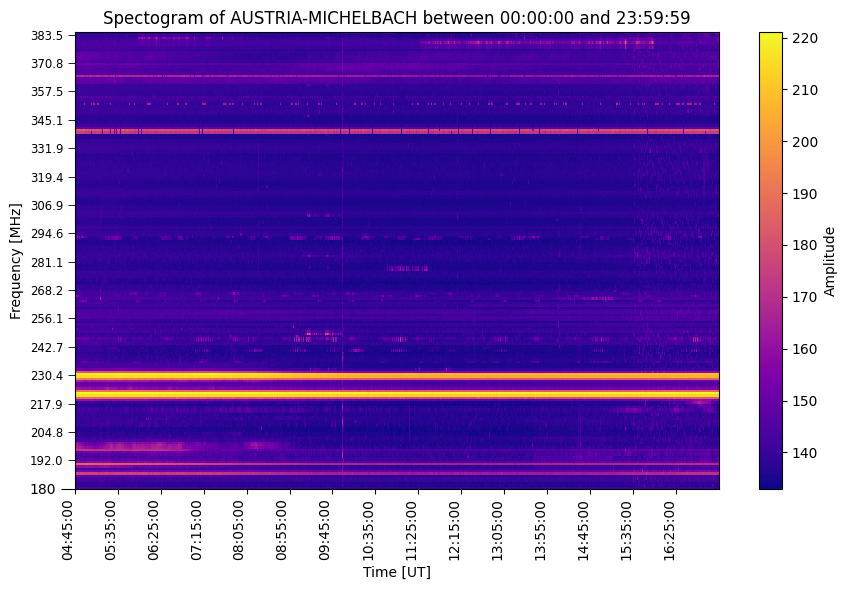

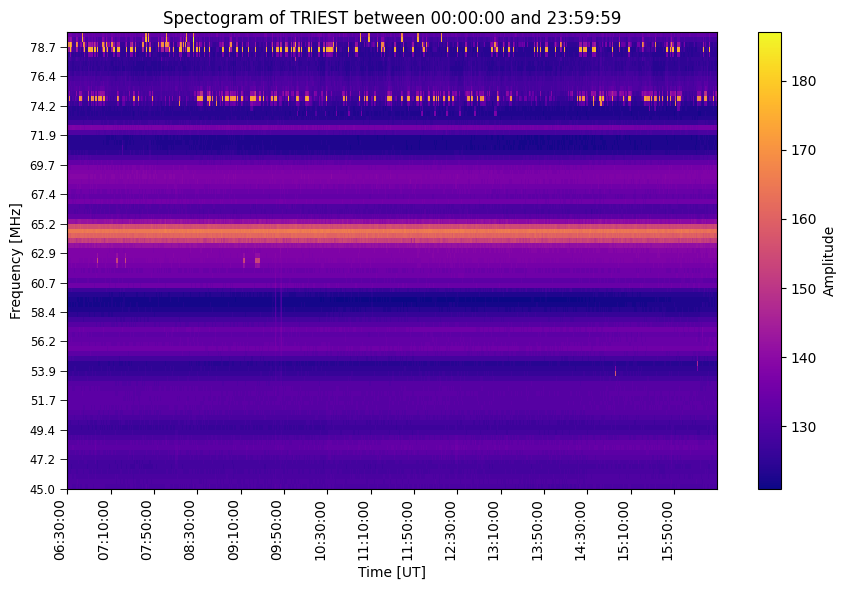

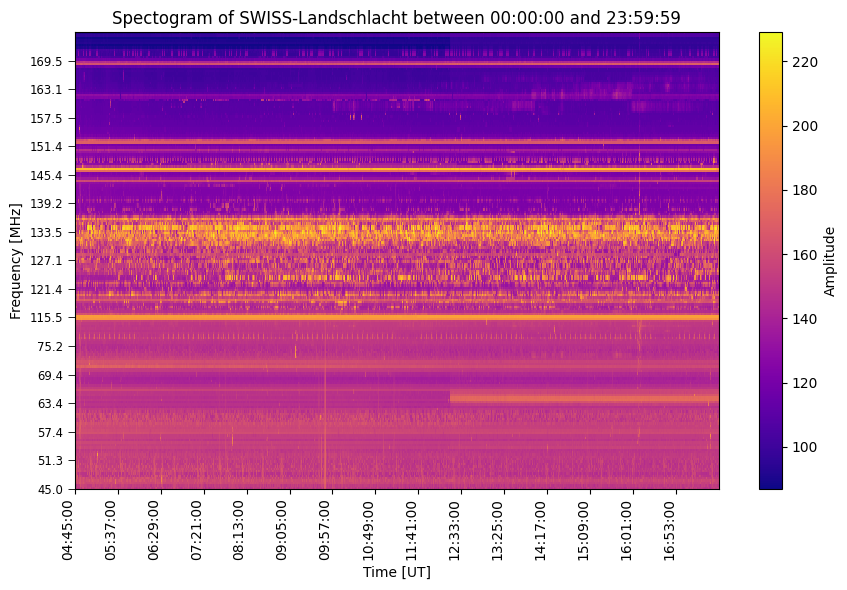

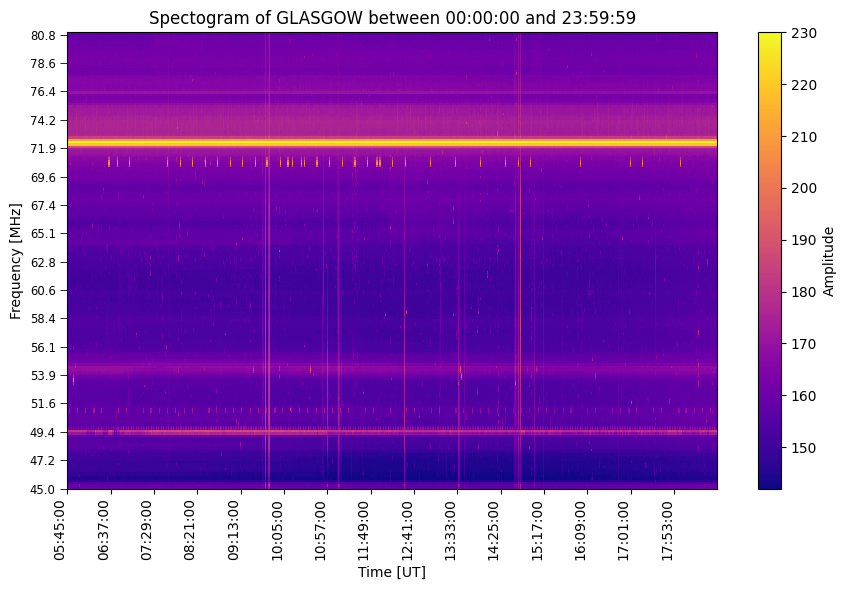

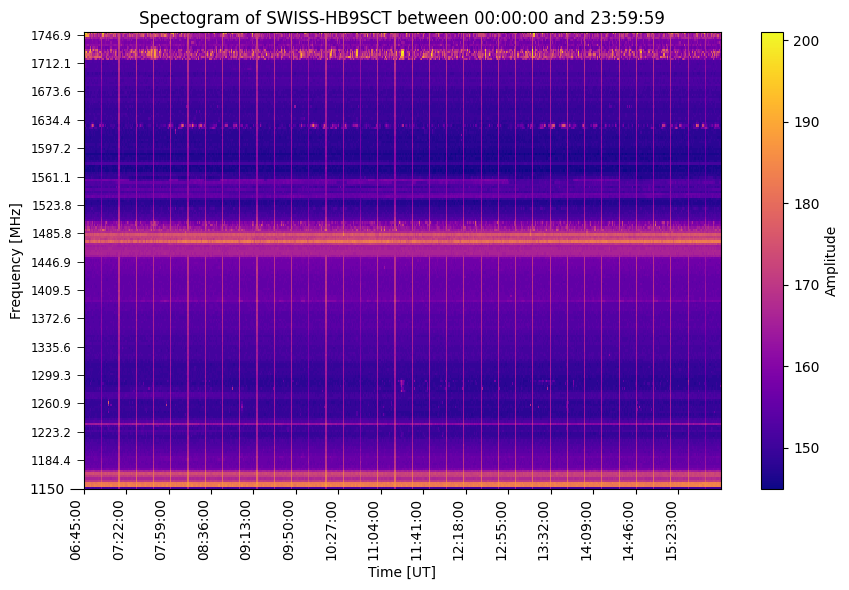

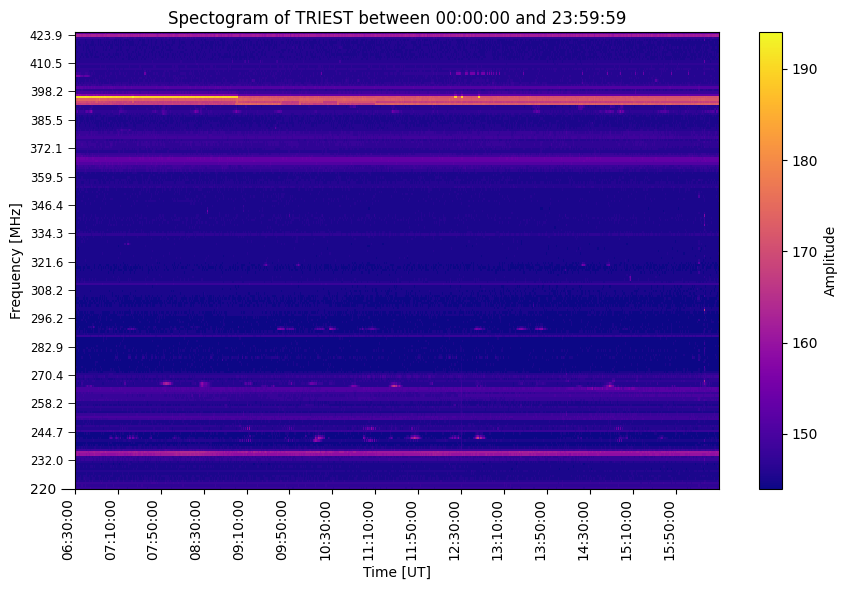

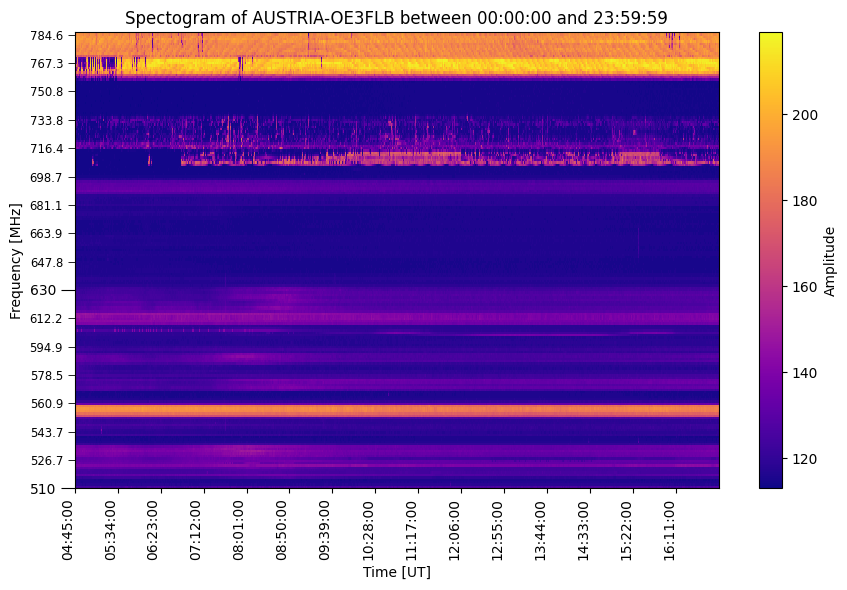

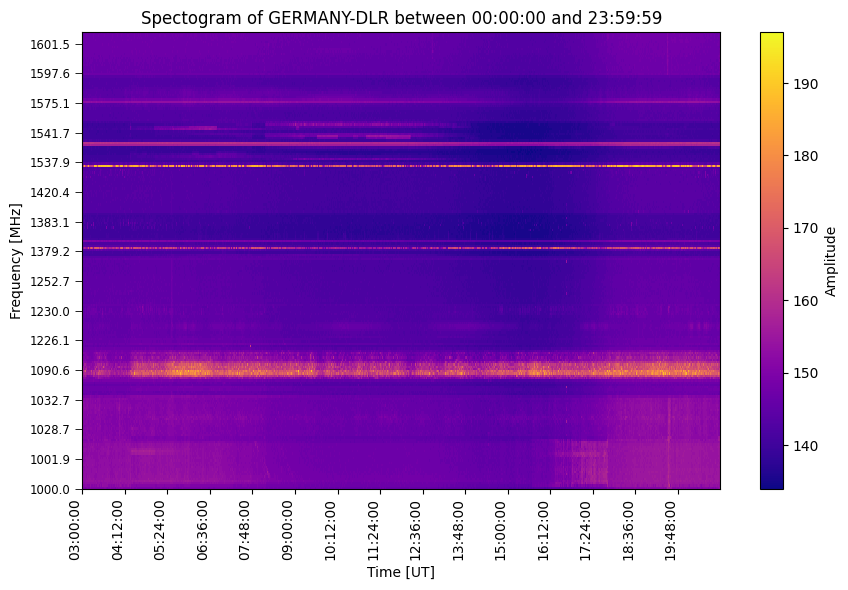

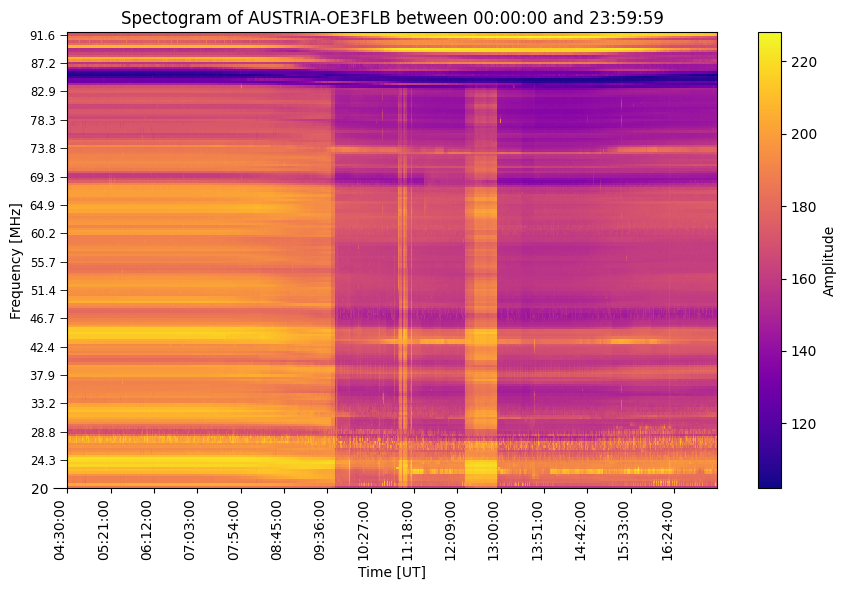

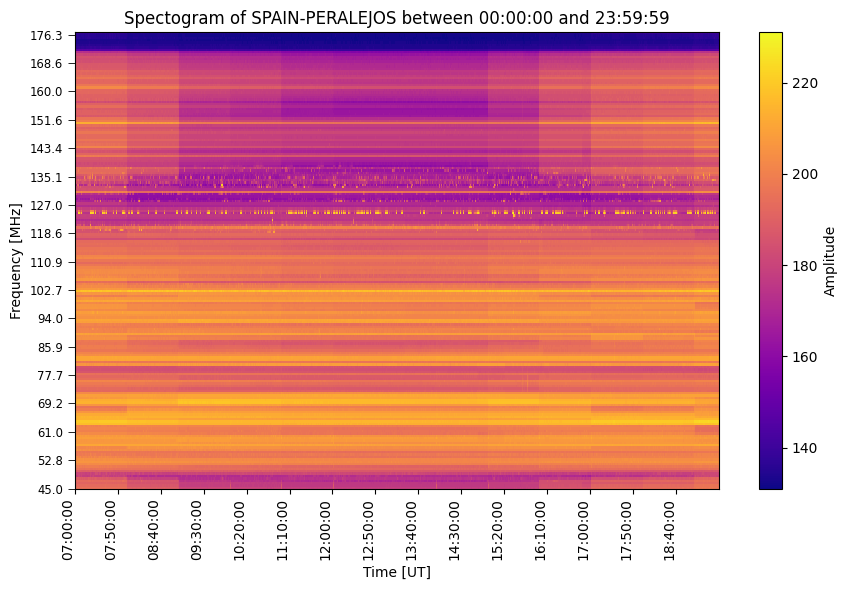

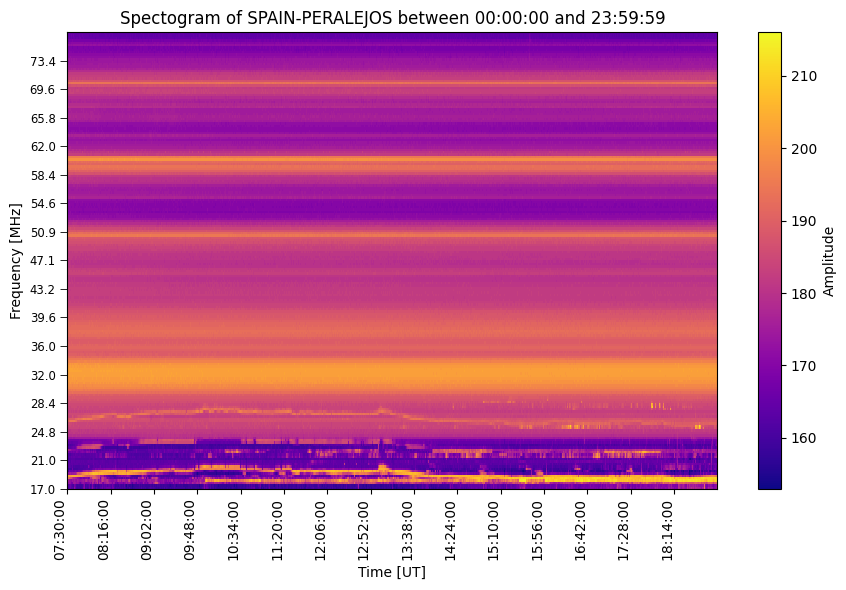

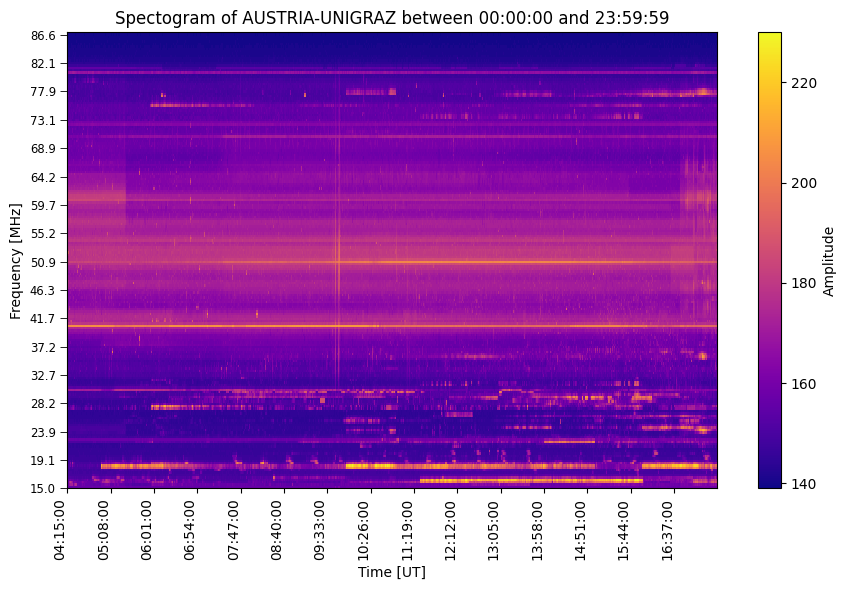

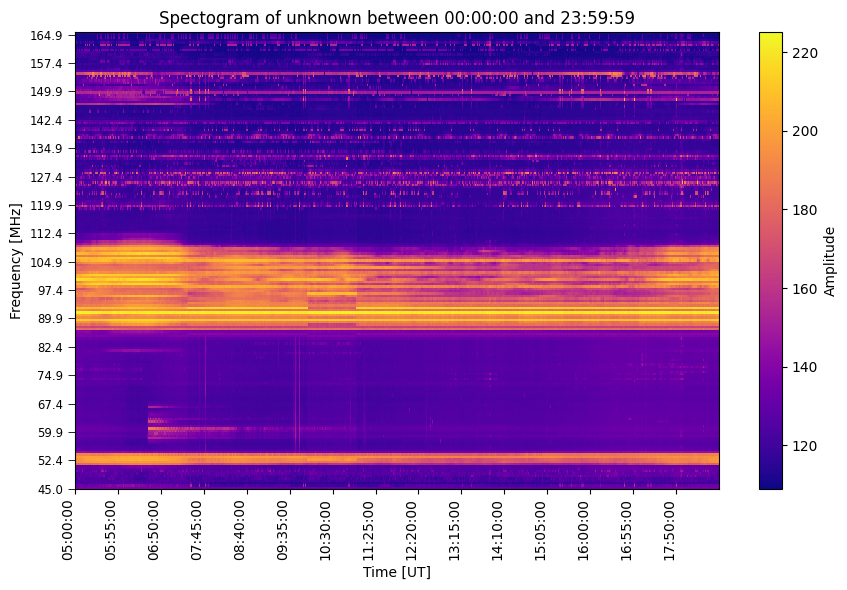

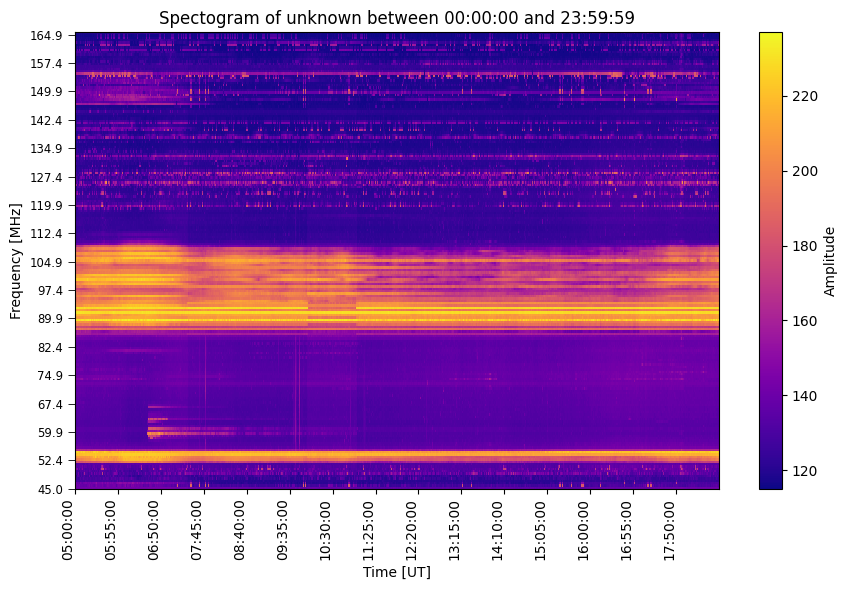

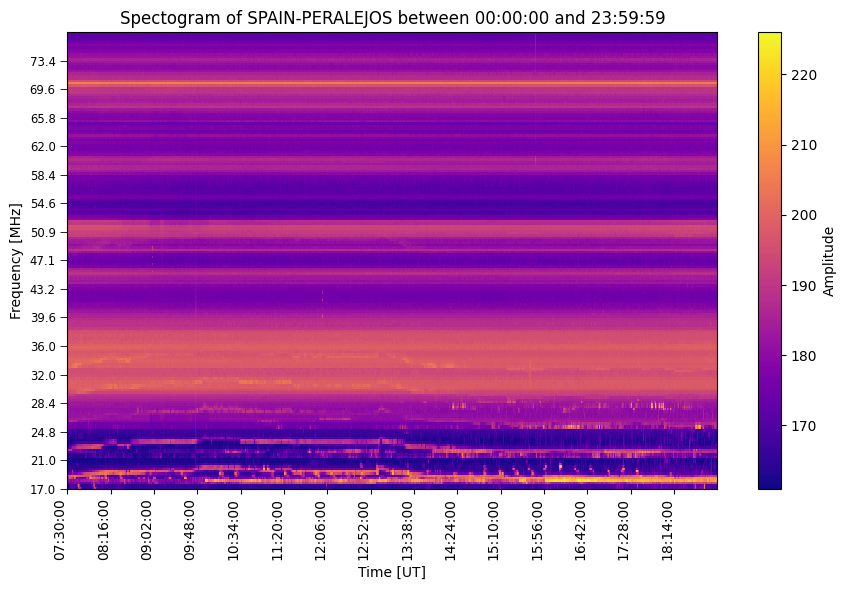

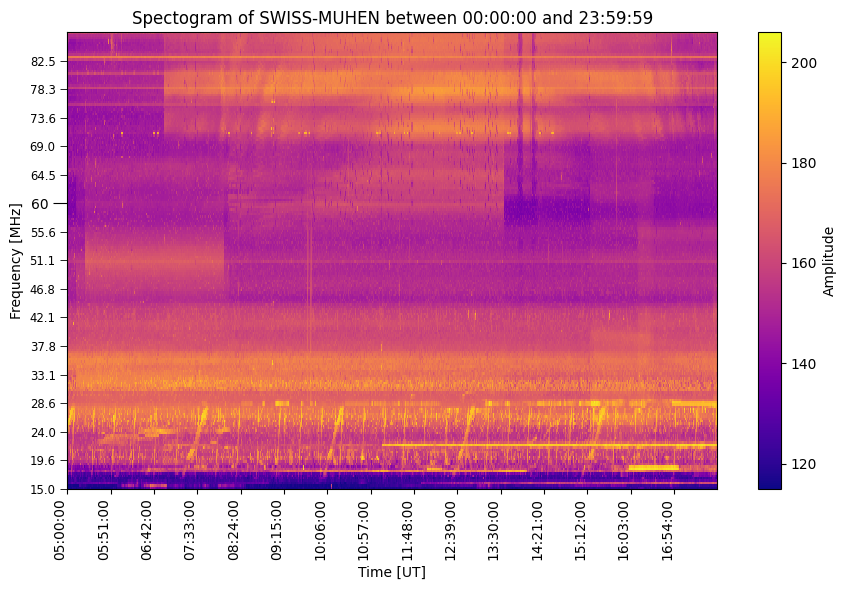

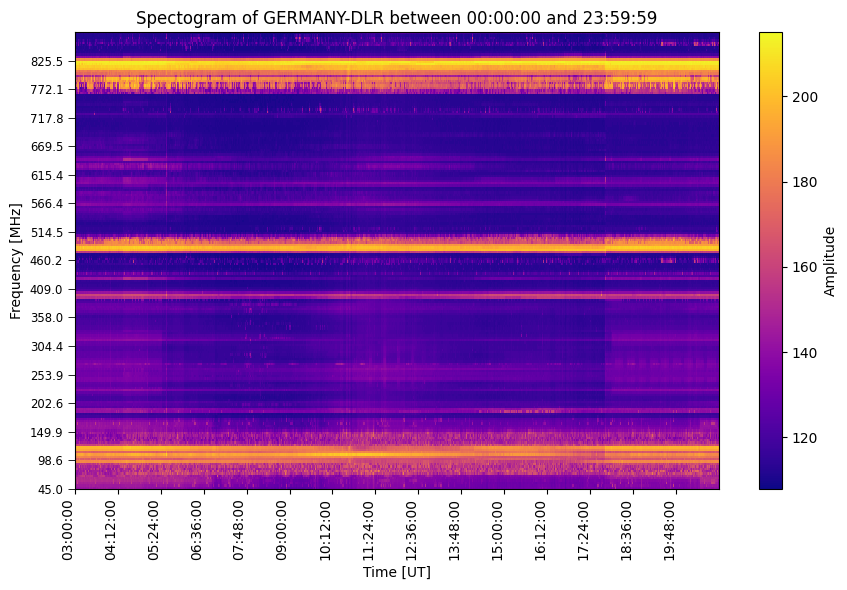

In [ ]:
for data in datas:
    try:
        instr_name = data.attrs['INSTRUME']
    except:
        instr_name = 'unknown'
    fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(data), start_datetime=start_datetime, end_datetime=end_datetime, instrument_name=instr_name)

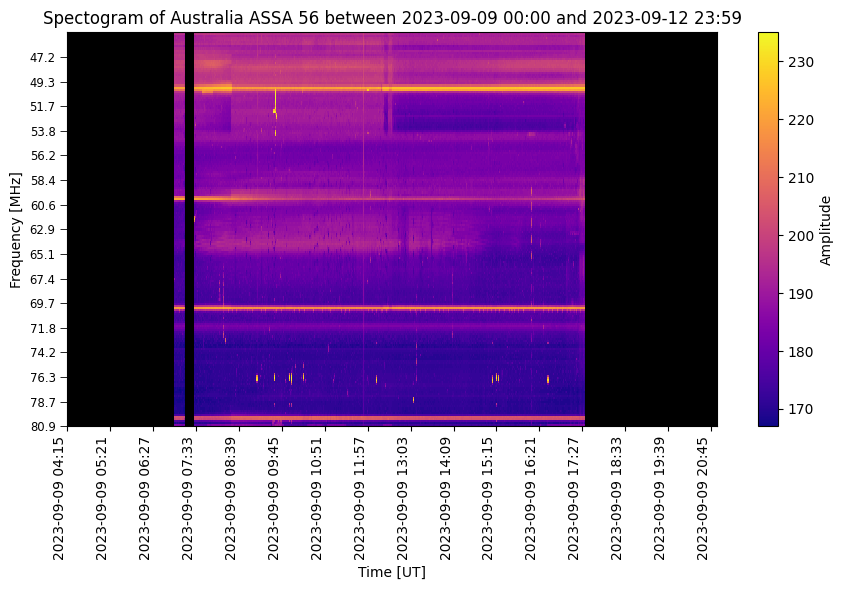

In [ ]:
fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(australia_assa_56).head(1000), instrument_name='Australia ASSA 56', start_datetime=start_datetime, end_datetime=end_datetime)

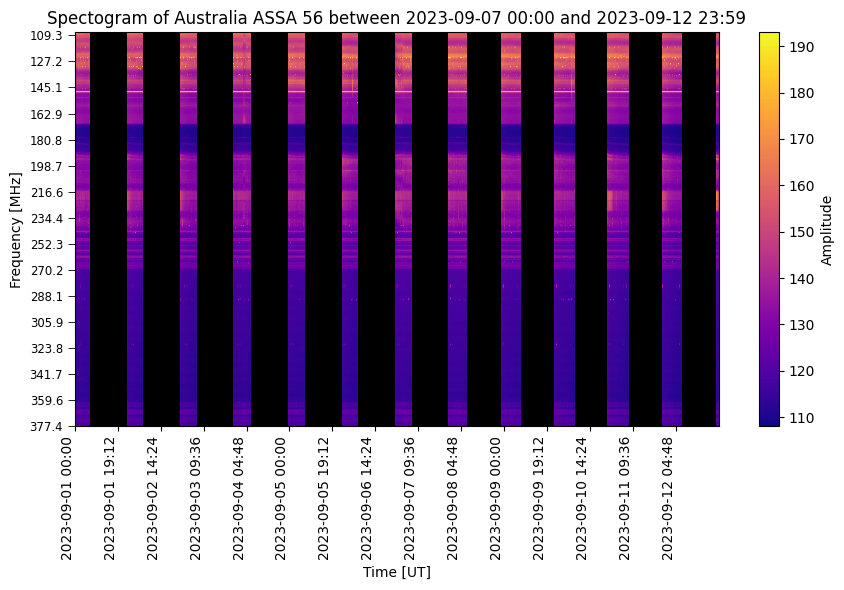

In [ ]:
fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(australia_assa_57), instrument_name='Australia ASSA 56', start_datetime=start_datetime, end_datetime=end_datetime)

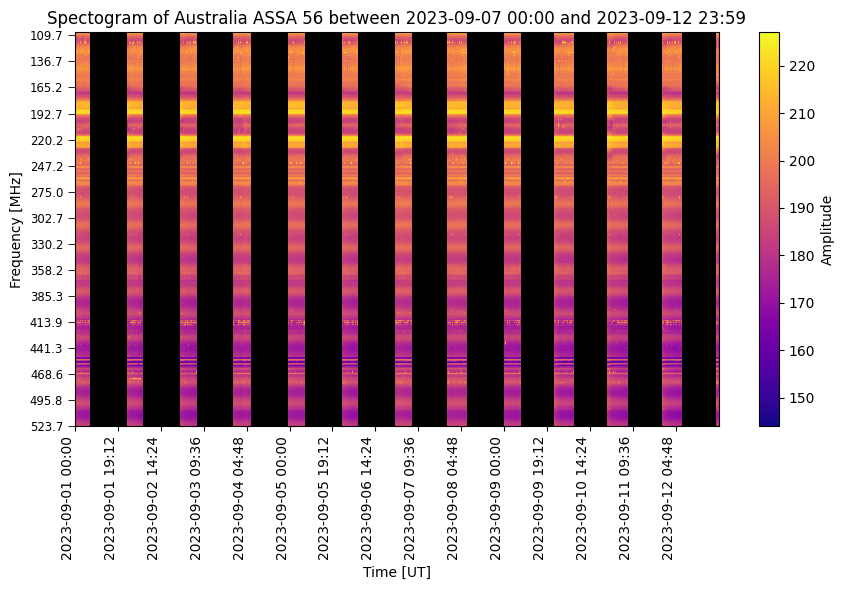

In [ ]:
fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(australia_assa_60), instrument_name='Australia ASSA 56', start_datetime=start_datetime, end_datetime=end_datetime)

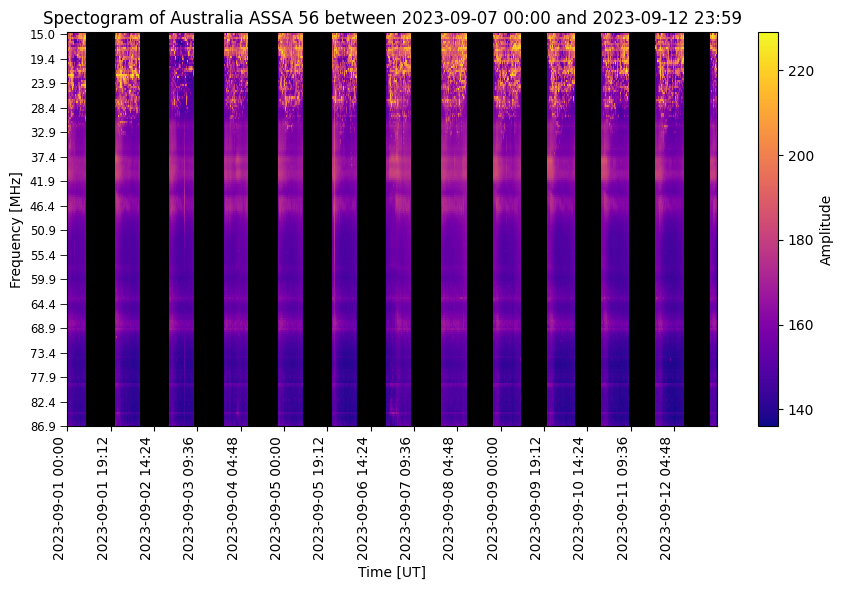

In [ ]:
fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(australia_assa_62), instrument_name='Australia ASSA 56', start_datetime=start_datetime, end_datetime=end_datetime)

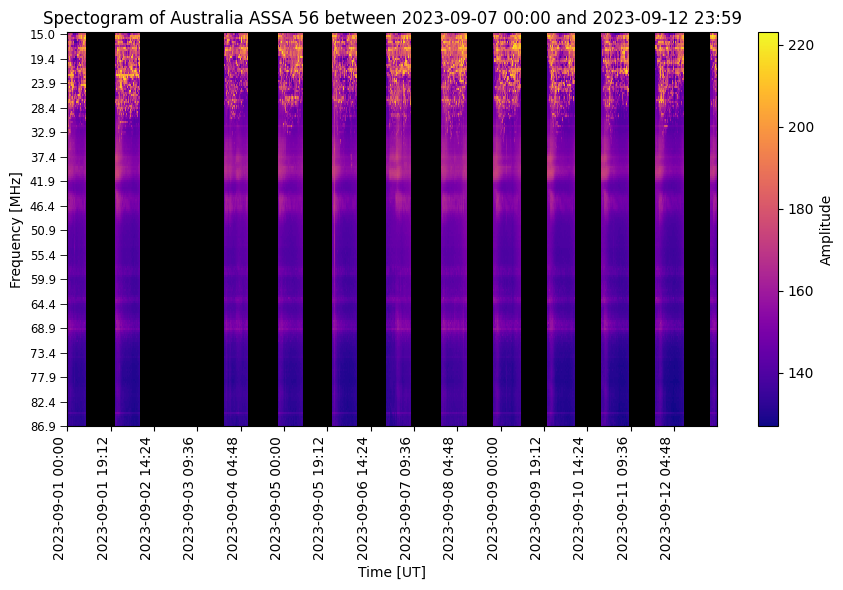

In [ ]:
fig = plot_spectogram_mpl(fill_missing_timesteps_with_nan(australia_assa_63), instrument_name='Australia ASSA 56', start_datetime=start_datetime, end_datetime=end_datetime)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert observed spectrograms to PyTorch tensors
O1_tensor = torch.tensor(O1, dtype=torch.float32, requires_grad=False)
O2_tensor = torch.tensor(O2, dtype=torch.float32, requires_grad=False)

# Define trainable weights initialized to 0.5
w1 = torch.tensor(0.5, dtype=torch.float32, requires_grad=True)
w2 = torch.tensor(0.5, dtype=torch.float32, requires_grad=True)

lambda_reg = 0.01  # Adjust based on your needs

# Define the optimizer
optimizer = optim.Adam([w1, w2], lr=0.01)

# Training loop
for epoch in range(1000):
    # Compute the estimated spectrogram
    S_hat = w1 * O1_tensor + w2 * O2_tensor
    
    # Compute loss
    loss = torch.sum((O1_tensor - S_hat) ** 2) + torch.sum((O2_tensor - S_hat) ** 2)
    
    # Compute image gradient and its sum for regularization
    grad_y, grad_x = torch.gradient(S_hat)
    reg = torch.sum(torch.abs(grad_y)) + torch.sum(torch.abs(grad_x))
    
    # Regularized loss
    loss_reg = loss + lambda_reg * reg
    
    # Backpropagation
    optimizer.zero_grad()
    loss_reg.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss_reg.item()}')

print("Optimized weights:", w1.item(), w2.item())


ModuleNotFoundError: No module named 'torch'